#Import Libraries

In [5]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets , transforms

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise. 

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

In [6]:
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,)) #how do we get this normalizartion values ;)
])

test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,),(0.3081,))  #how do we get this normalizartion values ;)
])

# Dataset and Creating Train/Test Split

In [7]:
train = datasets.MNIST(root = '/content',train=True,download=True,transform=train_transforms)
test = datasets.MNIST(root = '/content',train=False,download=True,transform=train_transforms)


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Dataloader Arguments & Test/Train Dataloaders


In [8]:
!nvidia-smi

Tue Jun  8 09:30:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |   1058MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
SEED = 1
# Cuda ?
cuda = torch.cuda.is_available()
print("Cuda Available?", cuda)

# For reproduciability (cpu)
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED) # For reproduciability (gpu)

dataloader_args = dict(shuffle=True,batch_size=128,num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train,**dataloader_args)
test_loader = torch.utils.data.DataLoader(test,**dataloader_args)

Cuda Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([28, 60000, 28])
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 1, 28, 28])
torch.Size([128])


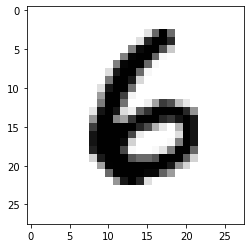

In [10]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train_data.shape)
print(' - Tensor Shape:', train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

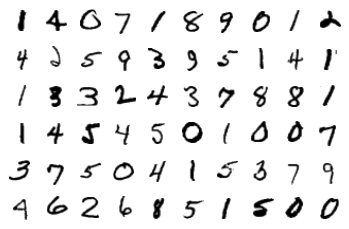

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

Let's run a small experiment

In [12]:
# simple transform without Normalization
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: torch.Size([60000, 28, 28])
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)




*   mean: tensor(0.1307)
*   std: tensor(0.3081)

Normalize the DS with this values.


# The model
We have added batchnorm and dropout & GAP. to make the traninng difficult and reduce params.

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()   #input size (1,28,28)
        #INPUT BLOCK
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=10,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()

        )   #output_size= (10,26,26) --> Global receptive_field = 3
        
        ##### CONV BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=10,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )   #output_size= (10,24,24) --> Global receptive_field = 5
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=20,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        )   #output_size= (20,22,22) --> Global receptive_field = 7

        ##### TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2,2) #output_size(20,11,11) --> Global receptive_field = 7
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=10,kernel_size=(1,1),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )   #output_size= (10,11,11) --> Global receptive_field = 7

        ##### CONV BLOCK 2
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=10,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )   #output_size= (10,9,9) --> Global receptive_field = 9
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=10,out_channels=20,kernel_size=(3,3),padding=0,bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU()
        )   #output_size= (20,7,7) --> Global receptive_field = 11

        ##### OUTPUT BLOCK
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=20,out_channels=10,kernel_size=(1,1),padding=0,bias=False),
            nn.BatchNorm2d(10),
            nn.ReLU()
        )   #output_size= (10,7,7) --> Global receptive_field = 11
        self.gap = nn.Sequential(
            nn.AvgPool2d(7,7)
        )   #output_size= (10,1,1)
        # self.convblock8 = nn.Sequential(
        #     nn.Conv2d(in_channels=10,out_channels=10,kernel_size=(7,7),padding=0,bias=False),
        #     #nn.BatchNorm2d(10), NEVER ADD BATCHNORM IN LAST LAYER!!
        #     #nn.ReLU()  NEVER IN LAST LAYER!!
        # )   #output_size= (10,1,1) --> Global receptive_field = 16 - ? NOT SURE

        self.dropout = nn.Dropout(0.25)



    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.dropout(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.dropout(x)
        x = self.convblock7(x)
        # x = self.convblock8(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params
Can't emphasize on how important viewing Model Summary is. 
Unfortunately, there is no in-built model visualizer :((, so we have to take external help

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1

In [15]:
!nvidia-smi

Tue Jun  8 09:30:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |   1058MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Training and Testing

We have added batchnorm and dropout. to make the traninng difficult


In [16]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model,device,train_loader,optimizer,epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx,(data,target) in enumerate(pbar):
    #get samples
    data,target = data.to(device),target.to(device)

    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # predict
    y_pred = model(data)
 
    # Calculate Loss
    loss = F.nll_loss(y_pred,target)
    train_losses.append(loss)   #appending to train loss

    #backprop
    loss.backward()
    optimizer.step()

    #update pbar-tqdm
    pred = y_pred.argmax(dim=1,keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))


In [17]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
  print("Epoch: ", epoch)
  train(model,device,train_loader,optimizer,epoch)
  test(model,device,test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch:  0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=0.35032328963279724 Batch_id=468 Accuracy=80.74: 100%|██████████| 469/469 [00:11<00:00, 41.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.5019, Accuracy: 8888/10000 (88.88%)

Epoch:  1


Loss=0.20000196993350983 Batch_id=468 Accuracy=95.93: 100%|██████████| 469/469 [00:11<00:00, 41.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2386, Accuracy: 9551/10000 (95.51%)

Epoch:  2


Loss=0.11828220635652542 Batch_id=468 Accuracy=96.99: 100%|██████████| 469/469 [00:11<00:00, 40.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2222, Accuracy: 9494/10000 (94.94%)

Epoch:  3


Loss=0.08429183810949326 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:11<00:00, 41.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1742, Accuracy: 9570/10000 (95.70%)

Epoch:  4


Loss=0.061044737696647644 Batch_id=468 Accuracy=97.77: 100%|██████████| 469/469 [00:11<00:00, 42.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1339, Accuracy: 9704/10000 (97.04%)

Epoch:  5


Loss=0.07118632644414902 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:11<00:00, 41.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1119, Accuracy: 9734/10000 (97.34%)

Epoch:  6


Loss=0.10330130904912949 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:11<00:00, 41.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1025, Accuracy: 9756/10000 (97.56%)

Epoch:  7


Loss=0.050247710198163986 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:11<00:00, 41.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1007, Accuracy: 9741/10000 (97.41%)

Epoch:  8


Loss=0.06556675583124161 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:11<00:00, 40.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1149, Accuracy: 9715/10000 (97.15%)

Epoch:  9


Loss=0.03784487023949623 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:11<00:00, 41.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0876, Accuracy: 9773/10000 (97.73%)

Epoch:  10


Loss=0.09450116753578186 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:11<00:00, 41.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1056, Accuracy: 9712/10000 (97.12%)

Epoch:  11


Loss=0.07097110897302628 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:11<00:00, 41.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0869, Accuracy: 9757/10000 (97.57%)

Epoch:  12


Loss=0.07733286172151566 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:11<00:00, 41.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1077, Accuracy: 9691/10000 (96.91%)

Epoch:  13


Loss=0.06834130734205246 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:11<00:00, 40.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0840, Accuracy: 9777/10000 (97.77%)

Epoch:  14


Loss=0.11942368745803833 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:11<00:00, 41.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0857, Accuracy: 9753/10000 (97.53%)

Epoch:  15


Loss=0.03573637828230858 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:11<00:00, 41.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0978, Accuracy: 9715/10000 (97.15%)

Epoch:  16


Loss=0.04695934057235718 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:11<00:00, 41.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0800, Accuracy: 9772/10000 (97.72%)

Epoch:  17


Loss=0.08890235424041748 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:11<00:00, 41.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0733, Accuracy: 9803/10000 (98.03%)

Epoch:  18


Loss=0.05570805445313454 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:11<00:00, 40.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0837, Accuracy: 9754/10000 (97.54%)

Epoch:  19


Loss=0.03761030361056328 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:11<00:00, 40.73it/s]



Test set: Average loss: 0.0775, Accuracy: 9789/10000 (97.89%)



Text(0.5, 1.0, 'Test Accuracy')

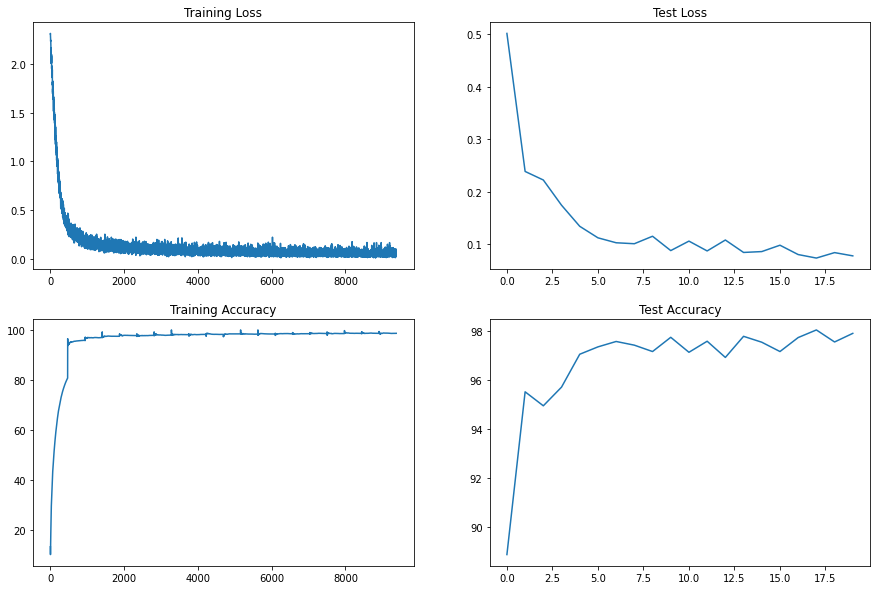

In [18]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")